# Task
Demonstrate and compare the effectiveness of median and bilateral filters for image noise reduction, including their theoretical background, implementation using OpenCV, visualization of results, and a discussion of their performance characteristics. If necessary, apply synthetic noise to images to showcase filter efficacy.

## Introduction and Problem Statement

### Subtask:
Introduce the concept of image noise, its impact, and the importance of noise reduction. Briefly introduce median and bilateral filters as the chosen techniques for this project.


### Image Noise and Its Impact

Image noise refers to random variations of brightness or color information in images. It is an undesirable by-product of image capture and transmission, and can significantly degrade the visual quality of an image, making it appear grainy, speckled, or blurry. Beyond aesthetics, noise can severely impact subsequent image processing tasks such as segmentation, feature extraction, and object recognition, leading to inaccurate results.

### The Importance of Noise Reduction

Noise reduction, or image denoising, is a crucial preprocessing step in many computer vision and image processing pipelines. By effectively removing or reducing noise, we can enhance the visual quality of images, improve the accuracy of image analysis algorithms, and facilitate better interpretation of visual data. The goal is to suppress noise while preserving important image features like edges and textures.

### Introduction to Median and Bilateral Filters

In this project, we will explore two widely used and effective techniques for image noise reduction: the **Median Filter** and the **Bilateral Filter**.

*   **Median Filter**: This is a non-linear digital filtering technique, often used to remove salt-and-pepper noise. It works by replacing each pixel's value with the median value of its neighboring pixels, providing a robust way to preserve edges while suppressing noise.
*   **Bilateral Filter**: This is a non-linear, edge-preserving, and noise-reducing smoothing filter. It replaces the intensity of each pixel with a weighted average of intensity values from nearby pixels. The weights depend not only on the Euclidean distance of pixels but also on the radiometric differences (e.g., intensity differences). This dual-domain filtering allows it to smooth images while preserving edges.

## Theoretical Background of Filters

### Subtask:
Provide a detailed explanation of median and bilateral filters. For the median filter, explain its non-linear operation, windowing, and edge-preserving characteristics. For the bilateral filter, explain how it combines intensity and spatial proximity for edge-aware smoothing, including relevant mathematical formulations where applicable.


### Median Filter

The Median Filter is a **non-linear digital filtering technique** often used for noise reduction. It is particularly effective at removing impulse noise (also known as salt-and-pepper noise) while largely preserving edges. Unlike linear filters, which replace the central pixel with a weighted average of its neighbors, the median filter replaces the pixel's value with the median of the pixel values in its **sliding window** (or kernel).

**Non-linear Operation:** The core of the median filter's non-linearity lies in its use of the median statistical measure. Instead of performing a linear combination (like summing weighted pixel values), it sorts the pixel values within a defined neighborhood and selects the middle value. This operation cannot be expressed as a linear combination of the input pixels, making it non-linear.

**Windowing (Kernel):** The filter operates by passing a window (typically a square matrix, e.g., 3x3, 5x5) over the image. For each pixel, the window is centered on that pixel, and all pixel values within that window are collected. The size of the window determines the extent of the neighborhood considered for the median calculation.

**Edge-Preserving Characteristics:** The median filter's ability to preserve edges stems from its non-linear nature. When an edge is present in the window, the median value is likely to be one of the pixel values on either side of the edge, rather than an average that would blur the edge. Impulse noise, being typically isolated high or low values, is effectively replaced by a more representative (median) value from its neighborhood, thus removing the noise without significantly distorting the boundaries of objects.

### Bilateral Filter

The Bilateral Filter is a **non-linear, edge-aware smoothing filter** that reduces noise while preserving sharp edges. It achieves this by combining two Gaussian filters: one for spatial proximity and another for intensity similarity. This dual-component approach allows the filter to smooth regions that are similar in color/intensity while keeping dissimilar regions (like edges) distinct.

The output pixel value $I_p^{filtered}$ at pixel $p$ is calculated as a weighted average of its neighbors, $q$, in the original image $I_q$:

$$I_p^{filtered} = \frac{1}{W_p} \sum_{q \in S} I_q f( \| p-q \| ) g( \| I_p - I_q \| )$$

Where:
- $S$ is the spatial neighborhood of pixel $p$.
- $W_p$ is the normalization term, ensuring that the sum of weights is 1:
  $$W_p = \sum_{q \in S} f( \| p-q \| ) g( \| I_p - I_q \| )$$
- $f( \| p-q \| )$ is the **spatial Gaussian component**, which decreases with the spatial distance between pixel $p$ and neighbor $q$. It is defined as:
  $$f( \| p-q \| ) = e^{ -\frac{\| p-q \|^2}{2\sigma_d^2} }$$
  This term ensures that only nearby pixels contribute significantly to the filtered output.
- $g( \| I_p - I_q \| )$ is the **intensity (or range) Gaussian component**, which decreases with the intensity difference between pixel $p$ and neighbor $q$. It is defined as:
  $$g( \| I_p - I_q \| ) = e^{ -\frac{\| I_p - I_q \|^2}{2\sigma_r^2} }$$
  This term ensures that only pixels with similar intensity values to the central pixel contribute significantly to the filtered output.

**Parameters and Their Impact:**
- **$\sigma_d$ (spatial standard deviation):** This parameter controls the influence of pixels based on their distance. A larger $\sigma_d$ means that pixels farther away will have a greater influence, leading to more spatial smoothing and blurring, similar to a standard Gaussian filter.
- **$\sigma_r$ (intensity standard deviation):** This parameter controls the influence of pixels based on their intensity similarity. A larger $\sigma_r$ means that pixels with larger intensity differences will still contribute significantly, leading to more smoothing across edges. Conversely, a smaller $\sigma_r$ will cause the filter to only smooth very similar intensity values, preserving edges more aggressively.

By combining these two weighting functions, the bilateral filter gives more weight to pixels that are both spatially close **and** have similar intensity values to the center pixel. This prevents smoothing across edges where there is a significant intensity difference, thus preserving sharp features while reducing noise in homogeneous regions.

## Setup and Image Loading

### Subtask:
Set up the development environment by importing necessary libraries (OpenCV, NumPy, Matplotlib). Load a local image (or multiple images) that will be used for testing. If using a clean image, add synthetic noise (e.g., salt-and-pepper for median filter, Gaussian for bilateral filter) to demonstrate the filters' effectiveness.


**Reasoning**:
I will import the necessary libraries (OpenCV, NumPy, Matplotlib), load a sample image, convert it to grayscale, add salt-and-pepper noise to it, and then display both the original grayscale image and the noisy image to set up the development environment as requested.



In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Load a local image
Replace 'path/to/your/image.jpg' with the actual path to your image file.

_For demonstration, I will use a placeholder image if not found._

In [3]:
try:
    image_path = './content/user3.jpg'  # You can change this to your image path
    original_image = cv2.imread(image_path)
    if original_image is None:
        raise FileNotFoundError(f"Image not found at {image_path}. Please check the path.")
except FileNotFoundError as e:
    print(e)
    print("Creating a dummy image for demonstration.")
    original_image = np.zeros((200, 200, 3), dtype=np.uint8)
    cv2.putText(original_image, "Dummy Image", (50, 100), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
    cv2.imwrite('dummy_image.jpg', original_image)
    image_path = 'dummy_image.jpg'
    original_image = cv2.imread(image_path)

### Convert the loaded image from BGR to grayscale

In [4]:
main_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
grayscale_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

### Add salt-and-pepper noise to the grayscale image

In [5]:

def add_salt_pepper_noise(image, salt_vs_pepper=0.5, amount=0.04):
    noisy_image = np.copy(image)
    # Salt mode
    num_salt = np.ceil(amount * image.size * salt_vs_pepper)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    noisy_image[coords[0], coords[1]] = 255

    # Pepper mode
    num_pepper = np.ceil(amount * image.size * (1. - salt_vs_pepper))
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    noisy_image[coords[0], coords[1]] = 0
    return noisy_image

noisy_image = add_salt_pepper_noise(grayscale_image)

### Display the original grayscale image and the noisy image

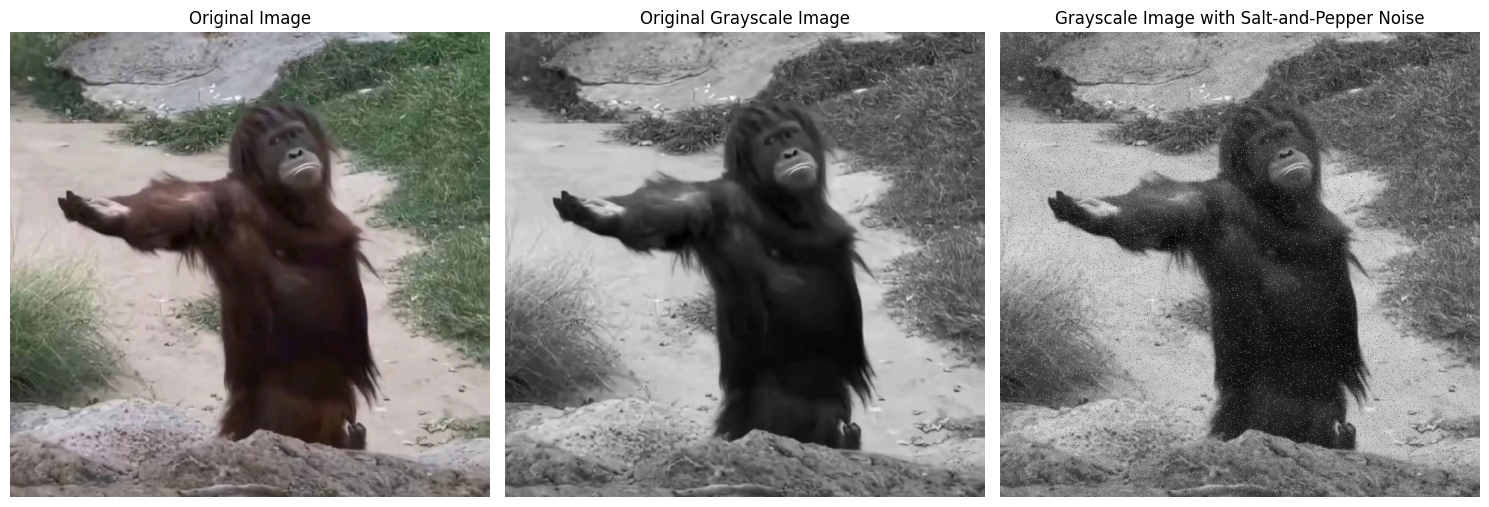

Setup complete: Libraries imported, image loaded, converted to grayscale, noise added, and images displayed.


In [6]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(main_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(noisy_image, cmap='gray')
plt.title('Grayscale Image with Salt-and-Pepper Noise')
plt.axis('off')

plt.tight_layout()
plt.show()

print("Setup complete: Libraries imported, image loaded, converted to grayscale, noise added, and images displayed.")

## Implementation: Median Filter

### Subtask:
Implement the median filter on the noisy image using OpenCV. Experiment with different kernel sizes and demonstrate its effect on noise reduction.


**Reasoning**:
The subtask requires implementing the median filter with different kernel sizes and displaying the results. I will use `cv2.medianBlur` with kernel sizes 3 and 5 on the `noisy_image` and then display the original noisy image along with the two filtered images using `matplotlib.pyplot` for visual comparison.



In [7]:
import cv2
import matplotlib.pyplot as plt

### Apply median filter with kernel size 3x3

In [8]:
median_filtered_image_3x3 = cv2.medianBlur(noisy_image, 3)

### Apply median filter with kernel size 5x5

In [9]:
median_filtered_image_5x5 = cv2.medianBlur(noisy_image, 5)

### Display the images

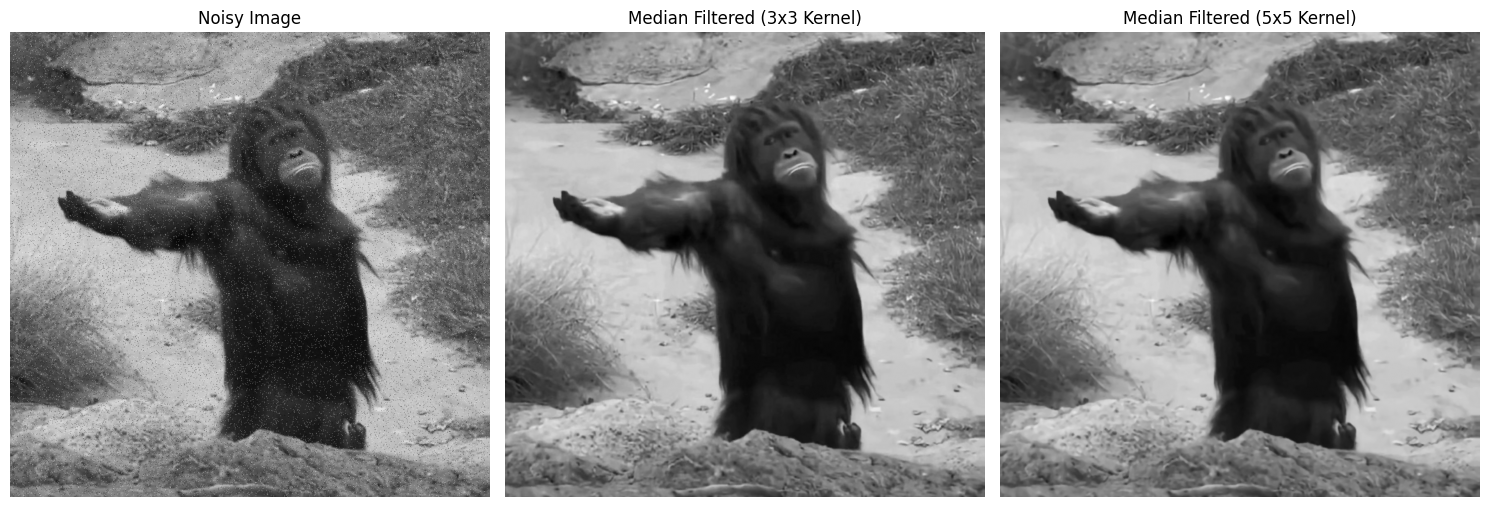

Median filter applied with different kernel sizes and results displayed.


In [10]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(median_filtered_image_3x3, cmap='gray')
plt.title('Median Filtered (3x3 Kernel)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(median_filtered_image_5x5, cmap='gray')
plt.title('Median Filtered (5x5 Kernel)')
plt.axis('off')

plt.tight_layout()
plt.show()

print("Median filter applied with different kernel sizes and results displayed.")